# Vanishing Gradients : Ungraded Lecture Notebook
In this notebook you'll take another look at vanishing gradients, from an intuitive standpoint.
## Background
Adding layers to a neural network introduces multiplicative effects in both forward and backward propagation. The back prop in particular presents a problem as the gradient of activation functions can be very small. Multiplied together across many layers, their product can be vanishingly small! This results in weights not being updated in the front layers and training not progressing.
<br/><br/>
Gradients of the sigmoid function, for example, are in the range 0 to 0.25. To calculate gradients for the front layers of a neural network the chain rule is used. This means that these tiny values are multiplied starting at the last layer, working backwards to the first layer, with the gradients shrinking exponentially at each step.
## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data, Activation & Gradient

### Data
I'll start be creating some data, nothing special going on here. Just some values spread across the interval -5 to 5.
* Try changing the range of values in the data to see how it impacts the plots that follow.

### Activation
The example here is sigmoid() to squish the data x into the interval 0 to 1.

### Gradient
This is the derivative of the sigmoid() activation function. It has a maximum of 0.25 at x = 0, the steepest point on the sigmoid plot.
* Try changing the x value for finding the tangent line in the plot.

<img src = 'sigmoid_tangent.png' width="width" height="height" style="height:250px;"/>




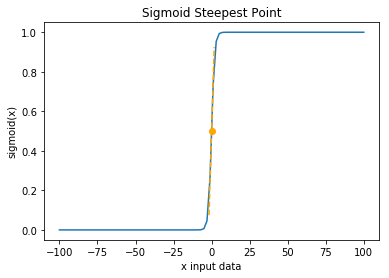

In [5]:
# Data
# Interval [-5, 5]
### START CODE HERE ###
x = np.linspace(-100, 100, 100)  # try changing the range of values in the data. eg: (-100,100,1000)
### END CODE HERE ###
# Activation
# Interval [0, 1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

activations = sigmoid(x)

# Gradient
# Interval [0, 0.25]
def sigmoid_gradient(x):
    return (x) * (1 - x)

gradients = sigmoid_gradient(activations)

# Plot sigmoid with tangent line
plt.plot(x, activations)
plt.title("Sigmoid Steepest Point")
plt.xlabel("x input data")
plt.ylabel("sigmoid(x)")

# Add the tangent line
### START CODE HERE ###
x_tan = 0   # x value to find the tangent. try different values within x declared above. eg: 2  
### END CODE HERE ###
y_tan = sigmoid(x_tan)  # y value
span = 1.7              # line span along x axis
data_tan = np.linspace(x_tan - span, x_tan + span)  # x values to plot
gradient_tan = sigmoid_gradient(sigmoid(x_tan))     # gradient of the tangent
tan = y_tan + gradient_tan * (data_tan - x_tan)     # y values to plot
plt.plot(x_tan, y_tan, marker="o", color="orange", label=True)  # marker
plt.plot(data_tan, tan, linestyle="--", color="orange")         # line
plt.show()

## Plots
### Sub Plots
Data values along the x-axis of the plots on the interval chosen for x, -5 to 5. Subplots:
- x vs x
- sigmoid of x
- gradient of sigmoid

Notice how the y axis keeps compressing from the left plot to the right plot. The interval range has shrunk from 10 to 1 to 0.25. How did this happen? As |x| gets larger the sigmoid approaches asymptotes at 0 and 1, and the sigmoid gradient shrinks towards 0.
* Try changing the range of values in the code block above to see how it impacts the plots.

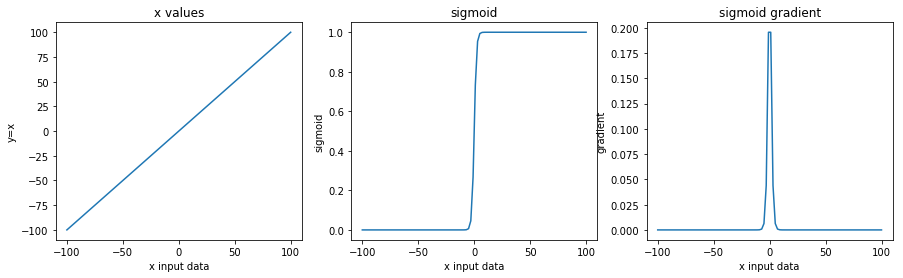

In [6]:
# Sub plots
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# X values
axs[0].plot(x, x)
axs[0].set_title("x values")
axs[0].set_ylabel("y=x")
axs[0].set_xlabel("x input data")

# Sigmoid
axs[1].plot(x, activations)
axs[1].set_title("sigmoid")
axs[1].set_ylabel("sigmoid")
axs[1].set_xlabel("x input data")

# Sigmoid gradient
axs[2].plot(x, gradients)
axs[2].set_title("sigmoid gradient")
axs[2].set_ylabel("gradient")
axs[2].set_xlabel("x input data")

fig.show()

### Single Plot
Putting all 3 series on a single plot can help visualize the compression. Notice how hard it is to interpret because sigmoid and sigmoid gradient are so small compared to the scale of the input data x.
* Trying changing the plot ylim to zoom in.

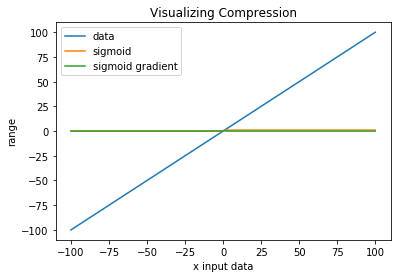


Max of x data : 100.0
Min of x data : -100.0 

Max of sigmoid : 1.000
Min of sigmoid : 0.000 

Max of gradients : 0.196
Min of gradients : 0.000


In [7]:
# Single plot
plt.plot(x, x, label="data")
plt.plot(x, activations, label="sigmoid")
plt.plot(x, gradients, label="sigmoid gradient")
plt.legend(loc="upper left")
plt.title("Visualizing Compression")
plt.xlabel("x input data")
plt.ylabel("range")
### START CODE HERE ###
# plt.ylim(-.5, 1.5)    # try shrinking the y axis limit for better visualization. eg: uncomment this line
### END CODE HERE ###
plt.show()

# Max, Min of each array
print("")
print("Max of x data :", np.max(x))
print("Min of x data :", np.min(x), "\n")
print("Max of sigmoid :", "{:.3f}".format(np.max(activations)))
print("Min of sigmoid :", "{:.3f}".format(np.min(activations)), "\n")
print("Max of gradients :", "{:.3f}".format(np.max(gradients)))
print("Min of gradients :", "{:.3f}".format(np.min(gradients)))

## Numerical Impact
###  Multiplication & Decay
Multiplying numbers smaller than 1 results in smaller and smaller numbers. Below is an example that finds the gradient for an input x = 0 and multiplies it over n steps. Look how quickly it 'Vanishes' to almost zero. Yet sigmoid(x=0)=0.5 which has a sigmoid gradient of 0.25 and that happens to be the largest sigmoid gradient possible!
<br/><br/>
(Note: This is NOT an implementation of back propagation.)
* Try changing the number of steps n.
* Try changing the input value x. Consider the impact on sigmoid and sigmoid gradient.

-- Inputs --
steps : 100
x value : 0
sigmoid : 0.50000
gradient : 0.25000 

-- Loop --
step 1 : 0.25
step 2 : 0.0625
step 3 : 0.015625
step 4 : 0.00390625
step 5 : 0.0009765625
step 6 : 0.000244140625
step 7 : 6.103515625e-05
step 8 : 1.52587890625e-05
step 9 : 3.814697265625e-06
step 10 : 9.5367431640625e-07
step 11 : 2.384185791015625e-07
step 12 : 5.960464477539063e-08
step 13 : 1.4901161193847656e-08
step 14 : 3.725290298461914e-09
step 15 : 9.313225746154785e-10
step 16 : 2.3283064365386963e-10
step 17 : 5.820766091346741e-11
step 18 : 1.4551915228366852e-11
step 19 : 3.637978807091713e-12
step 20 : 9.094947017729282e-13
step 21 : 2.2737367544323206e-13
step 22 : 5.684341886080802e-14
step 23 : 1.4210854715202004e-14
step 24 : 3.552713678800501e-15
step 25 : 8.881784197001252e-16
step 26 : 2.220446049250313e-16
step 27 : 5.551115123125783e-17
step 28 : 1.3877787807814457e-17
step 29 : 3.469446951953614e-18
step 30 : 8.673617379884035e-19
step 31 : 2.168404344971009e-19
step 32 : 5

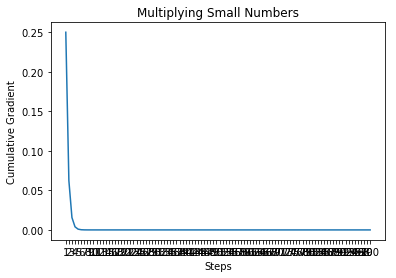

In [9]:
# Simulate decay
# Inputs
### START CODE HERE ###
n = 100  # number of steps : try changing this
x = 0  # value for input x : try changing this
### END CODE HERE ###
grad = sigmoid_gradient(sigmoid(x))
steps = np.arange(1, n + 1)
print("-- Inputs --")
print("steps :", n)
print("x value :", x)
print("sigmoid :", "{:.5f}".format(sigmoid(x)))
print("gradient :", "{:.5f}".format(grad), "\n")

# Loop to calculate cumulative total
print("-- Loop --")
vals = []
total_grad = 1  # initialize to 1 to satisfy first loop below
for s in steps:
    total_grad = total_grad * grad
    vals.append(total_grad)
    print("step", s, ":", total_grad)

print("")

# Plot
plt.plot(steps, vals)
plt.xticks(steps)
plt.title("Multiplying Small Numbers")
plt.xlabel("Steps")
plt.ylabel("Cumulative Gradient")
plt.show()

## Solution
One solution is to use activation functions that don't have tiny gradients. Other solutions involve more sophisticated model design. But they're both discussions for another time.